In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency



In [3]:
t1 = pd.read_csv('tbats_u1.csv', parse_dates=['dataora'], index_col='dataora')
t6 = pd.read_csv('tbats_u6.csv', parse_dates=['dataora'], index_col='dataora')

In [4]:
for ed in [t1, t6]:
  print('-----EDIFICIO------')
  for year in list(set(ed.index.year)):
    tmp_year = ed[ed.index.year == year]
    data = tmp_year['trend'] + tmp_year['season_weekly'] + tmp_year['season_daily']
    tmp_discr = pd.DataFrame(pd.cut(data, 5, labels=range(1,6))).reset_index()
    dfs = [group[0].value_counts()  for _,group in tmp_discr.groupby(pd.Grouper(key='dataora', freq='Q'))]
    tmp_table = pd.concat(dfs, axis=1)
    tmp_table.columns = ['Q1', 'Q2','Q3','Q4']
    print(tmp_table)
    print(str(year), 'chi2_value:', chi2_contingency(tmp_table.values)[0],'p-value:', chi2_contingency(tmp_table.values)[1])

-----EDIFICIO------
     Q1    Q2    Q3    Q4
1     0     0     0   129
2    68     9     8   605
3  1425  1146   725  1390
4   667   957  1015    84
5     0    72   460     0
2018 chi2_value: 3986.844152939853 p-value: 0.0
     Q1   Q2   Q3    Q4
1   151  354  124   153
2  1388  894  540  1736
3   620  670  786   319
4     1  211  652     0
5     0   55  106     0
2019 chi2_value: 2597.920550542322 p-value: 0.0
     Q1    Q2    Q3    Q4
1     0     0    24     0
2    28   390     0   156
3  1605  1466   684  1842
4   551   328  1235   210
5     0     0   265     0
2020 chi2_value: 3143.34008798523 p-value: 0.0
-----EDIFICIO------
    Q1   Q2   Q3   Q4
1    3  124   95  134
2  380  673  628  370
3  777  523  667  721
4  493  484  596  675
5  507  380  222  308
2018 chi2_value: 491.4547452809043 p-value: 1.4585971282226606e-97
    Q1    Q2    Q3    Q4
1    0     0     7    64
2  146    97     8    98
3  898  1067   539  1220
4  624   831  1336   699
5  492   189   318   127
2019 chi2_va

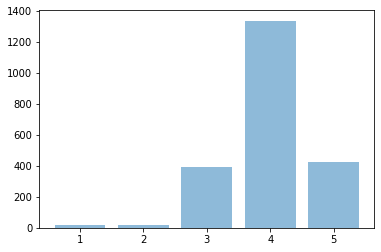

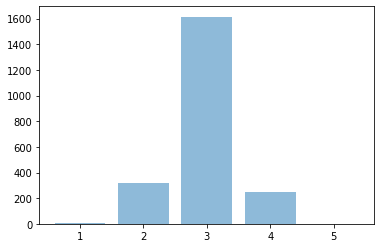

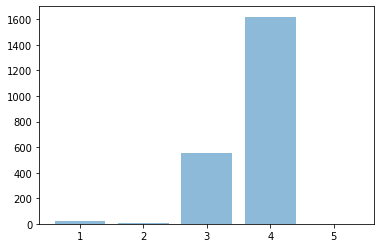

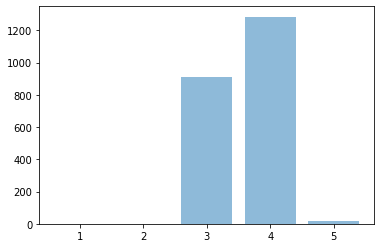

In [5]:
for df in dfs:
  plt.bar(df.index, df, align='center', alpha=0.5)
  plt.show()